In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In /home/alma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/alma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
df = pd.read_csv('/home/alma/Documentos/xPrize/data_alma/OxCGRT_latest.csv')

/home/alma/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Change blank space by _ in columns
df.rename(columns=lambda x: x.replace(' ','_').replace('/','_'), inplace=True)

In [4]:
#Assignate the correct type
df.Date = pd.to_datetime(df['Date'], format='%Y%m%d')
df = df.astype({'C1_School_closing':'category', 'C2_Workplace_closing':'category', 
           'C3_Cancel_public_events':'category','C4_Restrictions_on_gatherings':'category',
           'C5_Close_public_transport':'category', 'C6_Stay_at_home_requirements':'category', 
           'C7_Restrictions_on_internal_movement':'category', 'C8_International_travel_controls':'category', 
           'E1_Income_support':'category', 'E2_Debt_contract_relief':'category', 
           'H1_Public_information_campaigns':'category', 'H2_Testing_policy':'category', 
           'H3_Contact_tracing':'category',  'CountryCode':'category',
           'H6_Facial_Coverings':'category', 'H7_Vaccination_policy':'category', 'M1_Wildcard':'category'})

In [5]:
df.shape

(92834, 49)

In [6]:
df[df.RegionName.isna() == False].CountryName.unique()

array(['Brazil', 'United Kingdom', 'United States'], dtype=object)

In [21]:
#Number of nan
for col in df.columns:
    print(col, df[col].isnull().sum())

CountryName 0
CountryCode 0
RegionName 62820
RegionCode 62820
Date 0
C1_School_closing 0
C1_Flag 25428
C2_Workplace_closing 0
C2_Flag 31597
C3_Cancel_public_events 0
C3_Flag 27689
C4_Restrictions_on_gatherings 0
C4_Flag 31427
C5_Close_public_transport 0
C5_Flag 55026
C6_Stay_at_home_requirements 0
C6_Flag 38741
C7_Restrictions_on_internal_movement 0
C7_Flag 40379
C8_International_travel_controls 0
E1_Income_support 0
E1_Flag 47318
E2_Debt_contract_relief 0
E3_Fiscal_measures 0
E4_International_support 0
H1_Public_information_campaigns 0
H1_Flag 15556
H2_Testing_policy 0
H3_Contact_tracing 0
H4_Emergency_investment_in_healthcare 0
H5_Investment_in_vaccines 0
H6_Facial_Coverings 0
H6_Flag 36599
H7_Vaccination_policy 0
H7_Flag 91731
ConfirmedCases 0
ConfirmedDeaths 0
CountryRegion 0
Month 0
Year 0
Day 0
Week 0


In [8]:
#Jurisdiction, M1 and all the indexes can be dropped
df.drop(['Jurisdiction','M1_Wildcard', 'StringencyIndex', 'StringencyIndexForDisplay', 'StringencyLegacyIndex', 
        'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay',
        'ContainmentHealthIndex', 'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex', 
        'EconomicSupportIndexForDisplay'], axis=1, inplace=True)

In [9]:
#Create feature for CountryName and Region
df['CountryRegion'] = df.RegionName
df.CountryRegion = df.CountryRegion.fillna(df.CountryName)

In [10]:
#Delete USA, UK and BR only country data
indexes = df[((df.CountryRegion=='United States') | (df.CountryRegion=='United Kingdom')) | (df.CountryRegion=='Brazil')].index
df.drop(labels = indexes, axis=0, inplace=True)

In [11]:
#Check number of days that H7 is not 0 or nan
df[(df.H7_Vaccination_policy != 0) & (df.H7_Vaccination_policy.isna()==False)].Date.unique()

array(['2020-11-25T00:00:00.000000000', '2020-11-26T00:00:00.000000000',
       '2020-11-27T00:00:00.000000000', '2020-11-28T00:00:00.000000000',
       '2020-11-29T00:00:00.000000000', '2020-11-30T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2020-12-02T00:00:00.000000000',
       '2020-12-03T00:00:00.000000000', '2020-12-04T00:00:00.000000000',
       '2020-12-05T00:00:00.000000000', '2020-12-06T00:00:00.000000000',
       '2020-12-07T00:00:00.000000000', '2020-12-08T00:00:00.000000000',
       '2020-12-09T00:00:00.000000000', '2020-12-10T00:00:00.000000000',
       '2020-12-11T00:00:00.000000000', '2020-12-12T00:00:00.000000000',
       '2020-12-13T00:00:00.000000000', '2020-12-14T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [12]:
#Create new variables for day, month and year
df['Month'] = df.Date.apply(lambda x: x.month)
df['Year'] = df.Date.apply(lambda x: x.year)
df['Day'] = df.Date.apply(lambda x: x.day)

In [13]:
#Initialized values to 0 in categorical variables to then fill na with the previous value
df.loc[(df['Date']=='2020-01-01'), 'C1_School_closing'] = 0
df.loc[(df['Date']=='2020-01-01'), 'C2_Workplace_closing'] = 0
df.loc[(df['Date']=='2020-01-01'), 'C3_Cancel_public_events'] = 0
df.loc[(df['Date']=='2020-01-01'), 'C4_Restrictions_on_gatherings'] = 0
df.loc[(df['Date']=='2020-01-01'), 'C5_Close_public_transport'] = 0
df.loc[(df['Date']=='2020-01-01'), 'C6_Stay_at_home_requirements'] = 0
df.loc[(df['Date']=='2020-01-01'), 'C7_Restrictions_on_internal_movement'] = 0
df.loc[(df['Date']=='2020-01-01'), 'C8_International_travel_controls'] = 0
df.loc[(df['Date']=='2020-01-01'), 'E1_Income_support'] = 0
df.loc[(df['Date']=='2020-01-01'), 'E2_Debt_contract_relief'] = 0
df.loc[(df['Date']=='2020-01-01'), 'H1_Public_information_campaigns'] = 0
df.loc[(df['Date']=='2020-01-01'), 'H2_Testing_policy'] = 0
df.loc[(df['Date']=='2020-01-01'), 'H3_Contact_tracing'] = 0
df.loc[(df['Date']=='2020-01-01'), 'H6_Facial_Coverings'] = 0
df.loc[(df['Date']=='2020-01-01'), 'H7_Vaccination_policy'] = 0

In [14]:
#Fill NaN values by 0
df.C1_School_closing.fillna(method='ffill', inplace=True)
df.C2_Workplace_closing.fillna(method='ffill', inplace=True)
df.C3_Cancel_public_events.fillna(method='ffill', inplace=True)
df.C4_Restrictions_on_gatherings.fillna(method='ffill', inplace=True)
df.C5_Close_public_transport.fillna(method='ffill', inplace=True)
df.C6_Stay_at_home_requirements.fillna(method='ffill', inplace=True)
df.C7_Restrictions_on_internal_movement.fillna(method='ffill', inplace=True)
df.C8_International_travel_controls.fillna(method='ffill', inplace=True)
df.E1_Income_support.fillna(method='ffill', inplace=True)
df.E2_Debt_contract_relief.fillna(method='ffill', inplace=True)
df.E3_Fiscal_measures.fillna(0, inplace=True)
df.E4_International_support.fillna(0, inplace=True)
df.H1_Public_information_campaigns.fillna(method='ffill', inplace=True)
df.H2_Testing_policy.fillna(method='ffill', inplace=True)
df.H3_Contact_tracing.fillna(method='ffill', inplace=True)
df.H4_Emergency_investment_in_healthcare.fillna(0, inplace=True)
df.H5_Investment_in_vaccines.fillna(0, inplace=True)
df.H6_Facial_Coverings.fillna(method='ffill', inplace=True)
df.H7_Vaccination_policy.fillna(method='ffill', inplace=True)

In [15]:
#Confirmed cases fill na with previous values
df.loc[(df['Date']=='2020-01-01'), 'ConfirmedCases'] = 0
df.ConfirmedCases.fillna(method='ffill', inplace=True)

In [16]:
#Confirmed deaths fill na with previous values
df.loc[(df['Date']=='2020-01-01'), 'ConfirmedDeaths'] = 0
df.ConfirmedDeaths.fillna(method='ffill', inplace=True)

In [17]:
#Computing the mean of the cases for each month in each country
mean_month = pd.DataFrame(df.groupby(['Month', 'CountryRegion'])['ConfirmedCases'].mean())

In [18]:
#Create column of the number fo the week
df['Week'] = df['Date'].dt.strftime('%U')

In [19]:
#Trying to calculate the rolling mean of a week in each country
roll_mean_week = pd.DataFrame(df.groupby(['Week', 'CountryRegion'])['ConfirmedCases'].rolling(2).mean())

In [76]:
#Create Cateorical variable to countries. from 1 to 182.
df['CountryCodeCat'] = df.CountryCode.cat.codes

In [85]:
df_random = df.drop(['ConfirmedCases','ConfirmedDeaths', 'C1_Flag', 'C2_Flag', 'C3_Flag', 'C4_Flag', 'C5_Flag', 'C6_Flag','C7_Flag',
                     'E1_Flag', 'H1_Flag', 'H6_Flag', 'H7_Flag', 'CountryName', 'CountryCode', 'RegionName', 
                     'RegionCode','CountryRegion', 'Date', 'Month', 'Day'], axis = 1)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(df_random, df.ConfirmedCases, test_size=0.2, random_state=301)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)

regr.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.098388  ,
       0.00300538, 0.        , 0.        , 0.37176385, 0.        ,
       0.        , 0.        , 0.51173012, 0.01511265, 0.        ,
       0.        ])

In [87]:
x_train.columns

Index(['C1_School_closing', 'C2_Workplace_closing', 'C3_Cancel_public_events',
       'C4_Restrictions_on_gatherings', 'C5_Close_public_transport',
       'C6_Stay_at_home_requirements', 'C7_Restrictions_on_internal_movement',
       'C8_International_travel_controls', 'E1_Income_support',
       'E2_Debt_contract_relief', 'E3_Fiscal_measures',
       'E4_International_support', 'H1_Public_information_campaigns',
       'H2_Testing_policy', 'H3_Contact_tracing',
       'H4_Emergency_investment_in_healthcare', 'H5_Investment_in_vaccines',
       'H6_Facial_Coverings', 'H7_Vaccination_policy', 'Year',
       'CountryCodeCat'],
      dtype='object')

## Not useful code cells and plots

In [130]:
df[((df.ConfirmedCases.isna()) & (df.CountryName=='Brazil')) & ((df.Date > '2020-03-01') & (df.Date < '2020-11-30'))].Date.unique()

array(['2020-03-02T00:00:00.000000000', '2020-03-03T00:00:00.000000000',
       '2020-03-04T00:00:00.000000000', '2020-03-05T00:00:00.000000000',
       '2020-03-06T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-04-13T00:00:00.000000000', '2020-05-11T00:00:00.000000000',
       '2020-05-12T00:00:00.000000000', '2020-05-13T00:00:00.000000000',
       '2020-05-14T00:00:00.000000000', '2020-05-24T00:00:00.000000000',
       '2020-05-26T00:00:00.000000000', '2020-05-31T00:00:00.000000000',
       '2020-06-02T00:00:00.000000000', '2020-06-06T00:00:00.000000000',
       '2020-06-07T00:00:00.000000000', '2020-06-08T00:00:00.000000000',
       '2020-06-24T00:00:00.000000000', '2020-07-23T00:00:00.000000000',
       '2020-07-29T00:00:00.000000000', '2020-08-02T00:00:00.000000000',
       '2020-09-25T00:00:00.000000000', '2020-09-29

In [11]:
df_na = df[df['ConfirmedCases'].isna()]
confirmed_cases_month_na = df_na.groupby('Month')['ConfirmedCases'].size()
confirmed_cases_na = df_na.groupby('Date')['ConfirmedCases'].size()

<AxesSubplot:xlabel='Month'>

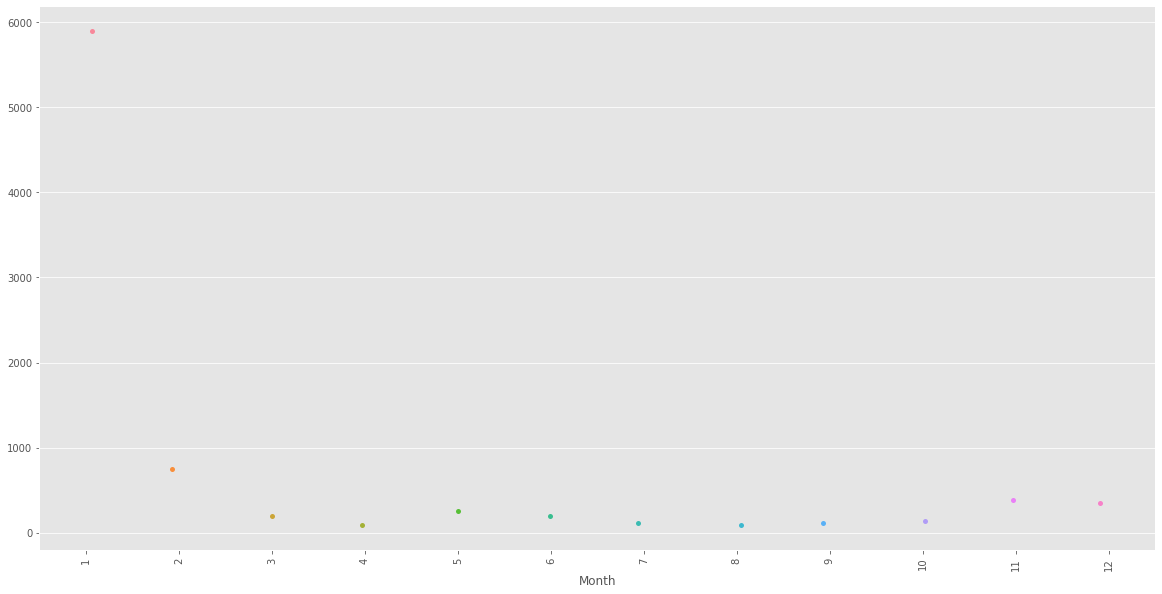

In [12]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.stripplot(x=confirmed_cases_month_na[confirmed_cases_month_na.values > 0].index, y=confirmed_cases_month_na[confirmed_cases_month_na.values > 0].values)

<AxesSubplot:xlabel='Date'>

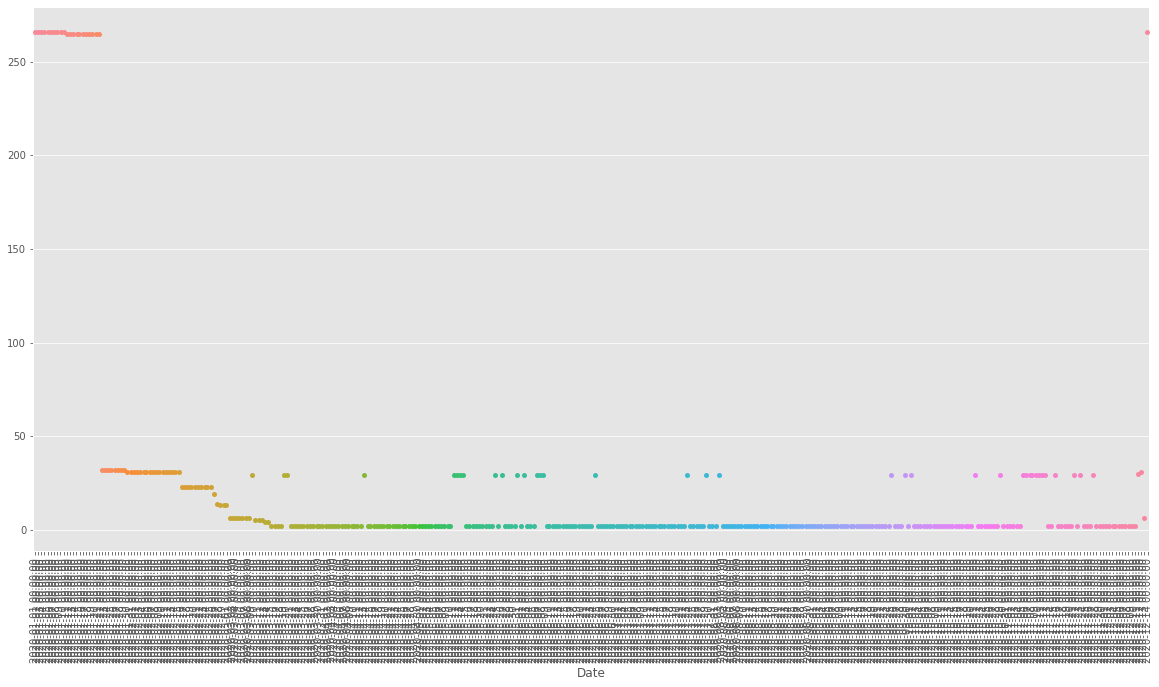

In [13]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.stripplot(x=confirmed_cases_na[confirmed_cases_na.values > 0].index, y=confirmed_cases_na[confirmed_cases_na.values > 0].values)